In [1]:
pip install skyfield pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.0/367.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 10.5 MB/s eta 0:00:00


In [2]:
from datetime import datetime, timedelta
import pandas as pd
from skyfield.api import load
from skyfield.api import Topos

# Load ephemeris data
eph = load('de421.bsp')
ts = load.timescale()

# Planets
planets = {
    'Jupiter': eph['jupiter barycenter'],
    'Saturn': eph['saturn barycenter'],
    'Mars': eph['mars'],
    'Neptune': eph['neptune barycenter'],
    'Uranus': eph['uranus barycenter']
}

# Dates
end_date = datetime.utcnow().date()
start_date = end_date - timedelta(days=365 * 20)
dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Observer location for geocentric
earth = eph['earth']

# Prepare data storage
data = []

for date in dates:
    t = ts.utc(date.year, date.month, date.day)

    row = {'Date': date}
    for name, planet in planets.items():
        # Geocentric: position from Earth
        astrometric = earth.at(t).observe(planet).apparent()
        geo_lon, _, _ = astrometric.ecliptic_latlon()
        row[f'{name}_Geo'] = geo_lon.degrees

        # Heliocentric: position from Sun
        heliocentric = eph['sun'].at(t).observe(planet)
        helio_lon, _, _ = heliocentric.ecliptic_latlon()
        row[f'{name}_Helio'] = helio_lon.degrees

    data.append(row)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to Excel
output_path = "planetary_degrees_20years.xlsx"
df.to_excel(output_path, index=False)

output_path


[#################################] 100% de421.bsp


'planetary_degrees_20years.xlsx'

In [4]:
# Re-import needed packages after code execution state reset
from datetime import datetime, timedelta
import pandas as pd
from skyfield.api import load

# Load ephemeris data
eph = load('de421.bsp')
ts = load.timescale()

# Planets
planets = {
    'Jupiter': eph['jupiter barycenter'],
    'Saturn': eph['saturn barycenter'],
    'Mars': eph['mars'],
    'Neptune': eph['neptune barycenter'],
    'Uranus': eph['uranus barycenter']
}

# Dates: Every day at 6am for 30 years
end_date = datetime.utcnow().date()
start_date = end_date - timedelta(days=365 * 30)
dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Observer location for geocentric
earth = eph['earth']

# Prepare data storage
data = []

for date in dates:
    t = ts.utc(date.year, date.month, date.day, 6)  # 6 AM UTC

    row = {'Date': date}
    for name, planet in planets.items():
        # Geocentric: position from Earth
        astrometric = earth.at(t).observe(planet).apparent()
        geo_lon, _, _ = astrometric.ecliptic_latlon()
        row[f'{name}_Geo'] = geo_lon.degrees

        # Heliocentric: position from Sun
        heliocentric = eph['sun'].at(t).observe(planet)
        helio_lon, _, _ = heliocentric.ecliptic_latlon()
        row[f'{name}_Helio'] = helio_lon.degrees

    data.append(row)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to Excel
output_path = "planetary_degrees_30years_6am.xlsx"
df.to_excel(output_path, index=False)

output_path


'planetary_degrees_30years_6am.xlsx'

In [5]:
df

,Date,Jupiter_Geo,Jupiter_Helio,Saturn_Geo,Saturn_Helio,Mars_Geo,Mars_Helio,Neptune_Geo,Neptune_Helio,Uranus_Geo,Uranus_Helio
0,1995-06-03,0.799511,0.647615,-1.988250,-2.020054,1.286678,1.129100,0.555623,0.541837,-0.555995,-0.536474
1,1995-06-04,0.797502,0.646056,-1.992325,-2.020881,1.265546,1.117455,0.555662,0.541662,-0.556471,-0.536582
2,1995-06-05,0.795438,0.644496,-1.996422,-2.021708,1.244598,1.105728,0.555696,0.541487,-0.556941,-0.536690
3,1995-06-06,0.793320,0.642934,-2.000541,-2.022534,1.223833,1.093920,0.555727,0.541312,-0.557406,-0.536798
4,1995-06-07,0.791148,0.641371,-2.004680,-2.023360,1.203247,1.082031,0.555753,0.541136,-0.557865,-0.536906
...,...,...,...,...,...,...,...,...,...,...,...
10946,2025-05-22,-0.199613,-0.234164,-2.070077,-2.164797,1.608840,1.564651,-1.291151,-1.312634,-0.215252,-0.226218
10947,2025-05-23,-0.197777,-0.232254,-2.073727,-2.165504,1.592161,1.557064,-1.291891,-1.312760,-0.215122,-0.226072
10948,2025-05-24,-0.195950,-0.230344,-2.077412,-2.166212,1.575588,1.549382,-1.292639,-1.312885,-0.214996,-0.225926
10949,2025-05-25,-0.194133,-0.228433,-2.081132,-2.166918,1.559119,1.541606,-1.293393,-1.313011,-0.214873,-0.225780


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
pip install pandas skyfield matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.0/367.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 18.6 MB/s eta 0:00:00


[#################################] 100% de421.bsp


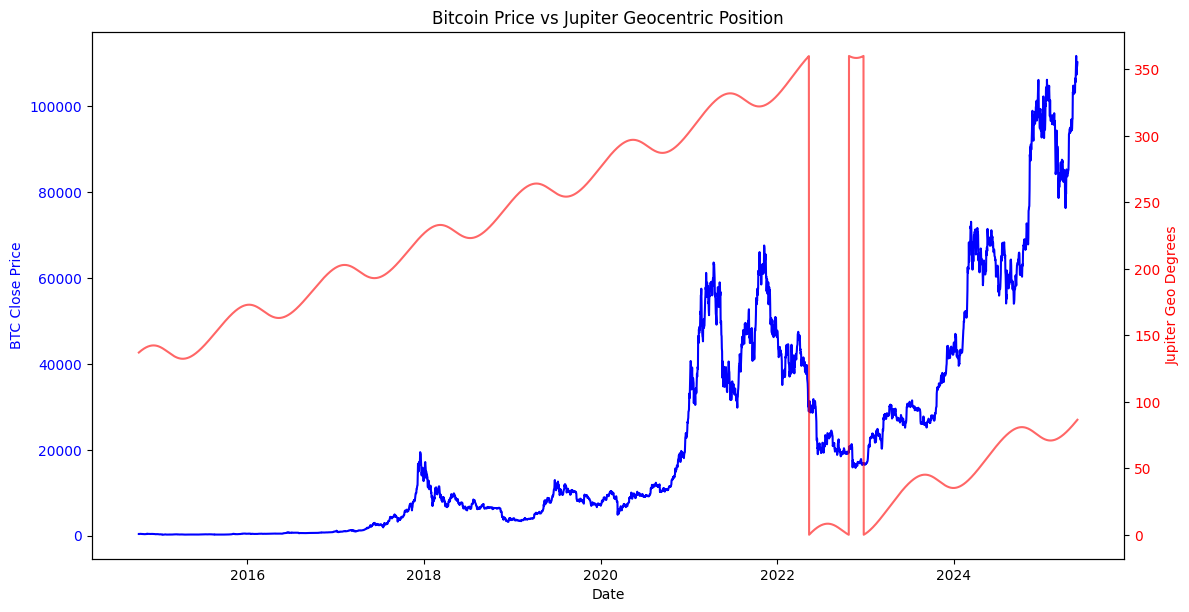

In [2]:
import pandas as pd
from skyfield.api import load
import matplotlib.pyplot as plt

# Load Bitcoin data
btc_data = pd.read_csv('INDEX_BTCUSD, D (1).csv', parse_dates=['time'])

# Skyfield ephemeris
eph = load('de421.bsp')
ts = load.timescale()

planets = {
    'Jupiter': eph['jupiter barycenter'],
    'Saturn': eph['saturn barycenter'],
    'Mercury': eph['mercury'],
    'Uranus': eph['uranus barycenter'],
    'Neptune': eph['neptune barycenter']
}

sun = eph['sun']
earth = eph['earth']

positions_data = []

for date in btc_data['time']:
    t = ts.utc(date.year, date.month, date.day)
    row = {'Date': date}

    # Heliocentric and geocentric positions
    for name, planet in planets.items():
        helio_pos = sun.at(t).observe(planet).ecliptic_latlon()[1].degrees % 360
        geo_pos = earth.at(t).observe(planet).ecliptic_latlon()[1].degrees % 360
        row[f'{name}_Helio'] = helio_pos
        row[f'{name}_Geo'] = geo_pos

    positions_data.append(row)

planet_positions = pd.DataFrame(positions_data)
merged_data = pd.merge(btc_data, planet_positions, left_on='time', right_on='Date')

# Save merged data
merged_data.to_csv('btc_planet_positions.csv', index=False)

# Plot example (Jupiter Geo position vs BTC price)
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(merged_data['time'], merged_data['close'], color='blue', label='BTC Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_data['time'], merged_data['Jupiter_Geo'], color='red', alpha=0.6, label='Jupiter Geo Position')
ax2.set_ylabel('Jupiter Geo Degrees', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Bitcoin Price vs Jupiter Geocentric Position')
plt.show()


In [3]:
import pandas as pd
import numpy as np

# Load your merged data
data = pd.read_csv('btc_planet_positions.csv')

# Example: Define bottoms and tops manually or use a threshold-based approach
bottom_threshold = data['close'].quantile(0.1)
top_threshold = data['close'].quantile(0.9)

# Flagging bottoms and tops
data['Bottom'] = data['close'] < bottom_threshold
data['Top'] = data['close'] > top_threshold

# Jupiter Geo degree analysis example:
bottoms_jupiter = data.loc[data['Bottom'], 'Jupiter_Geo']
tops_jupiter = data.loc[data['Top'], 'Jupiter_Geo']

# Histogram or Probability calculation
bins = np.arange(0, 361, 30)  # Every 30 degrees
bottom_counts, _ = np.histogram(bottoms_jupiter, bins=bins)
top_counts, _ = np.histogram(tops_jupiter, bins=bins)

bottom_prob = bottom_counts / bottom_counts.sum()
top_prob = top_counts / top_counts.sum()

prob_df = pd.DataFrame({
    'Degree_Range': [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)],
    'Bottom_Probability': bottom_prob,
    'Top_Probability': top_prob
})

print(prob_df)


   Degree_Range  Bottom_Probability  Top_Probability
0          0-30            0.000000         0.000000
1         30-60            0.000000         0.200514
2         60-90            0.000000         0.753213
3        90-120            0.000000         0.000000
4       120-150            0.714653         0.000000
5       150-180            0.285347         0.000000
6       180-210            0.000000         0.000000
7       210-240            0.000000         0.000000
8       240-270            0.000000         0.000000
9       270-300            0.000000         0.000000
10      300-330            0.000000         0.046272
11      330-360            0.000000         0.000000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skyfield.api import load

# Load ephemeris and data
btc_data = pd.read_csv('btc_planet_positions.csv', parse_dates=['time'])
eph = load('de421.bsp')
ts = load.timescale()

planets = ['Jupiter', 'Saturn', 'Mercury', 'Uranus', 'Neptune']
sun = eph['sun']
earth = eph['earth']

harmonic = 8
harmonic_increment = 360 / harmonic

harmonic_data = []

for date in btc_data['time']:
    t = ts.utc(date.year, date.month, date.day)
    row = {'Date': date}

    for planet_name in planets:
        planet = eph[planet_name.lower() + ' barycenter'] if planet_name != 'Mercury' else eph['mercury']

        geo_pos = earth.at(t).observe(planet).ecliptic_latlon()[1].degrees % 360
        harmonic_pos = geo_pos % harmonic_increment
        row[f'{planet_name}_Geo'] = geo_pos
        row[f'{planet_name}_Harmonic'] = harmonic_pos

    harmonic_data.append(row)

harmonic_df = pd.DataFrame(harmonic_data)
merged_df = pd.merge(btc_data, harmonic_df, left_on='time', right_on='Date')

merged_df.to_csv('btc_planet_harmonics.csv', index=False)


In [5]:
import numpy as np
import pandas as pd

data = pd.read_csv('btc_planet_harmonics.csv')

# Identify top and bottom based on quantiles
bottom_threshold = data['close'].quantile(0.1)
top_threshold = data['close'].quantile(0.9)

data['Bottom'] = data['close'] < bottom_threshold
data['Top'] = data['close'] > top_threshold

results = []

for planet in planets:
    harmonic_col = f'{planet}_Harmonic'
    bins = np.linspace(0, harmonic_increment, 9)  # Divide harmonic into 8 equal sub-bins

    bottom_counts, _ = np.histogram(data.loc[data['Bottom'], harmonic_col], bins=bins)
    top_counts, _ = np.histogram(data.loc[data['Top'], harmonic_col], bins=bins)

    bottom_prob = bottom_counts / bottom_counts.sum()
    top_prob = top_counts / top_counts.sum()

    harmonic_ranges = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)]

    df = pd.DataFrame({
        'Planet': planet,
        'Harmonic_Range': harmonic_ranges,
        'Bottom_Probability': bottom_prob,
        'Top_Probability': top_prob
    })

    results.append(df)

harmonic_prob_df = pd.concat(results, ignore_index=True)
harmonic_prob_df.to_csv('btc_planet_harmonic_probabilities.csv', index=False)
print(harmonic_prob_df)


     Planet Harmonic_Range  Bottom_Probability  Top_Probability
0   Jupiter        0.0-5.6            0.251928         0.064267
1   Jupiter       5.6-11.2            0.197943         0.092545
2   Jupiter      11.2-16.9            0.069409         0.056555
3   Jupiter      16.9-22.5            0.066838         0.048843
4   Jupiter      22.5-28.1            0.069409         0.226221
5   Jupiter      28.1-33.8            0.066838         0.233933
6   Jupiter      33.8-39.4            0.059126         0.197943
7   Jupiter      39.4-45.0            0.218509         0.079692
8    Saturn        0.0-5.6            0.000000         0.000000
9    Saturn       5.6-11.2            0.066838         0.000000
10   Saturn      11.2-16.9            0.488432         0.000000
11   Saturn      16.9-22.5            0.424165         0.000000
12   Saturn      22.5-28.1            0.007712         0.228792
13   Saturn      28.1-33.8            0.012853         0.411311
14   Saturn      33.8-39.4            0.

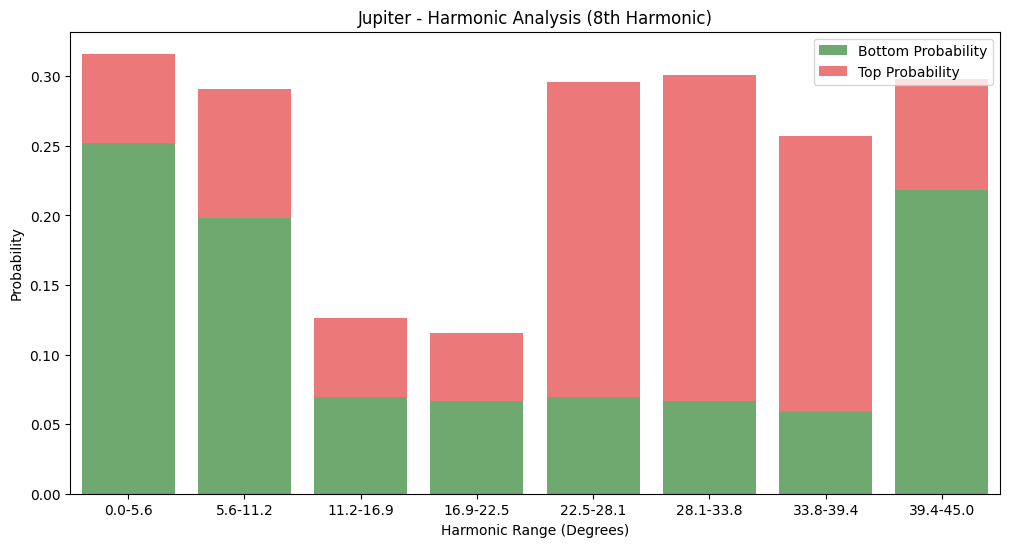

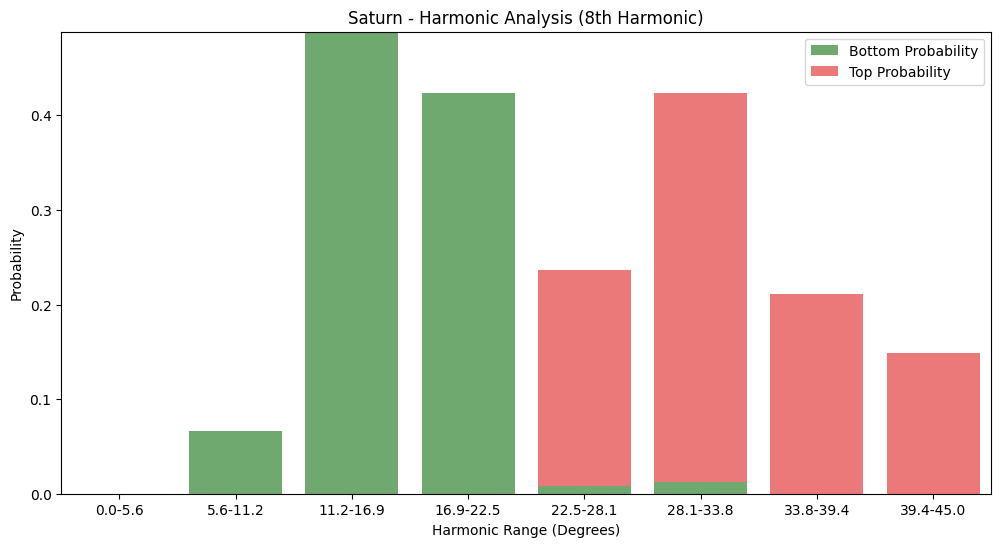

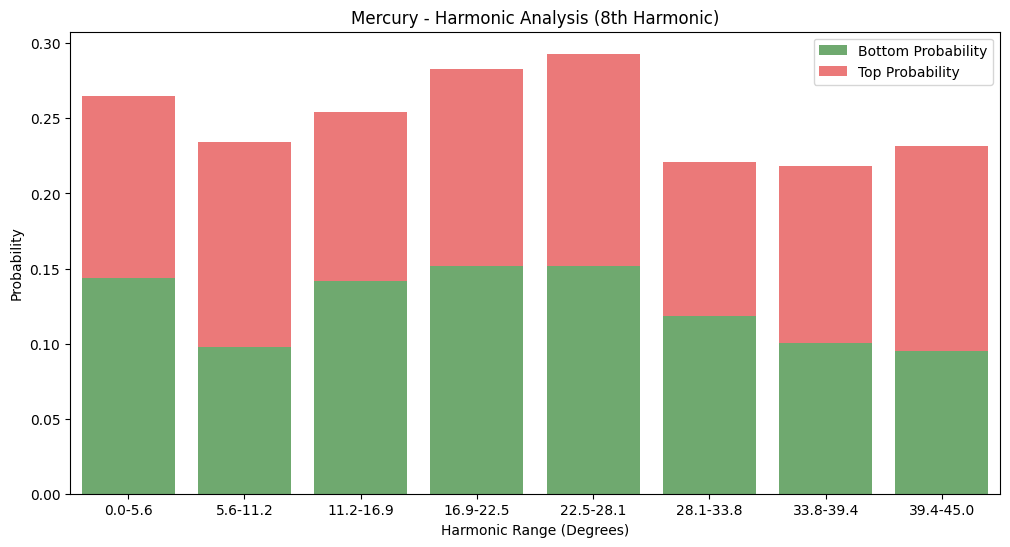

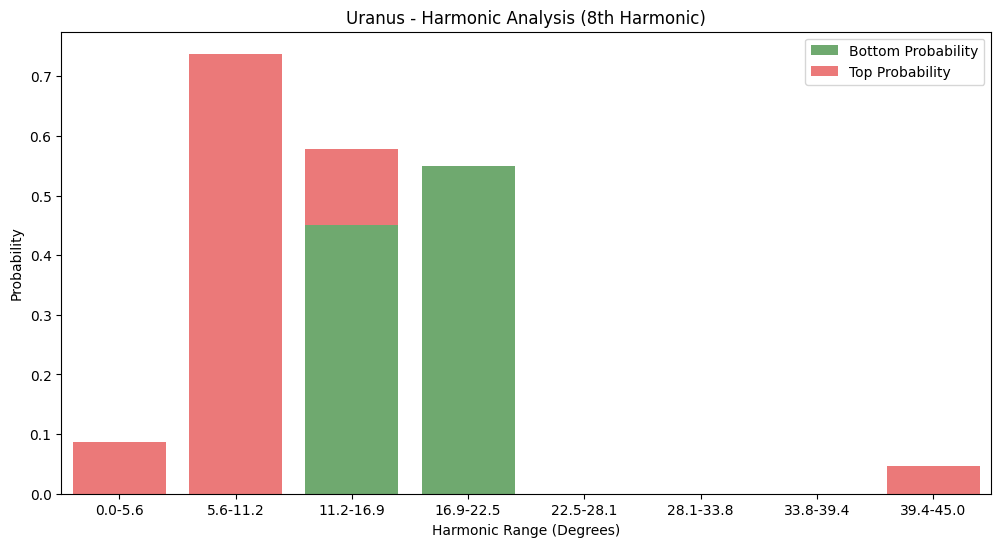

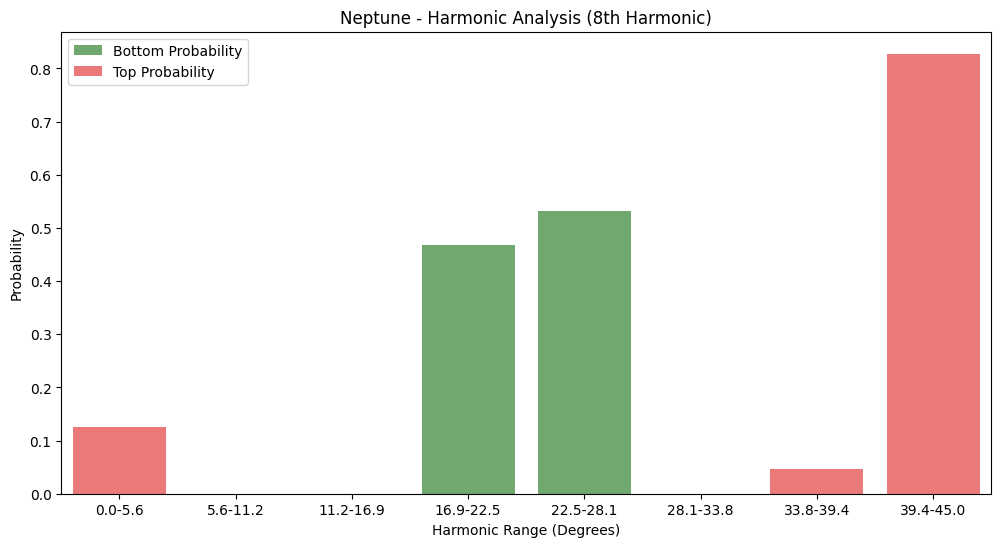

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

harmonic_prob_df = pd.read_csv('btc_planet_harmonic_probabilities.csv')

for planet in planets:
    plt.figure(figsize=(12,6))
    subset = harmonic_prob_df[harmonic_prob_df['Planet'] == planet]

    sns.barplot(x='Harmonic_Range', y='Bottom_Probability', data=subset, color='green', label='Bottom Probability', alpha=0.6)
    sns.barplot(x='Harmonic_Range', y='Top_Probability', data=subset, color='red', label='Top Probability', alpha=0.6, bottom=subset['Bottom_Probability'])

    plt.title(f'{planet} - Harmonic Analysis (8th Harmonic)')
    plt.xlabel('Harmonic Range (Degrees)')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()
